In [4]:
config = {
  'user': 'root',
  'password': 'root',
  'host': '127.0.0.1',
  'port': 8889,
  'database': 'adt_hw1',
  'raise_on_warnings': True
}

In [2]:
pip install mysql-connector-python

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
# create a MySQL server connection object
import mysql.connector
mydb = mysql.connector.connect(**config)

In [6]:
# cursor object
my_cursor = mydb.cursor(dictionary=True)

In [7]:
import mysql.connector
import pandas as pd

In [9]:
# Function to run a single query and return the results as a pandas DataFrame
def run_query(query):
    my_cursor.execute(query)
    rows = my_cursor.fetchall()
    return pd.DataFrame(rows)

## Exploration

In [10]:
# Query 1: Count of doctors accepting new patients
query1 = "SELECT COUNT(*) AS doctors_accepting_new_patients FROM doctors WHERE new_patients = 'Yes';"
result1 = run_query(query1)
print("Query 1 Results:")
print(result1)

Query 1 Results:
   doctors_accepting_new_patients
0                              16


In [11]:
# Query 2: Distribution of doctors across different cities
query2 = "SELECT city, COUNT(doctor_id) AS number_of_doctors FROM hospitals GROUP BY city;"
result2 = run_query(query2)
print("\nQuery 2 Results:")
print(result2)



Query 2 Results:
            city  number_of_doctors
0         Auburn                  1
1         Fresno                  1
2     Long Beach                  1
3    Los Angeles                  2
4        Oakland                  1
5     Sacramento                  4
6      San Diego                  1
7  San Francisco                  3
8       San Jose                  3
9  Santa Barbara                  3


In [12]:
# Query 3: Number of doctors with each type of license, without JOINs
query3 = "SELECT license, SUM(CASE WHEN gender = 'Male' THEN 1 ELSE 0 END) AS male_doctors, SUM(CASE WHEN gender = 'Female' THEN 1 ELSE 0 END) AS female_doctors FROM doctors GROUP BY license;"
result3 = run_query(query3)
print("\nQuery 3 Results:")
print(result3)


Query 3 Results:
  license male_doctors female_doctors
0      MD            3              8
1     MFT            0              4
2     PhD            4              1


In [13]:
# Query 4: Count of 'MD' doctors treating 'Diabetes'
query4 = "SELECT COUNT(*) AS md_diabetes_doctors FROM doctors WHERE license = 'MD' AND doctor_id IN (SELECT doctor_id FROM specialties WHERE speciality_one = 'Diabetes' OR speciality_two = 'Diabetes' OR speciality_three = 'Diabetes');"
result4 = run_query(query4)
print("\nQuery 4 Results:")
print(result4)


Query 4 Results:
   md_diabetes_doctors
0                    4


In [14]:
# Query 5: Average number of doctors per hospital
query5 = "SELECT AVG(doctor_count) as average_doctors_per_hospital FROM (SELECT hospital_id, COUNT(doctor_id) as doctor_count FROM hospitals GROUP BY hospital_id) AS doctor_counts;"
result5 = run_query(query5)
print("\nQuery 5 Results:")
print(result5)


Query 5 Results:
  average_doctors_per_hospital
0                       1.0000


### Decide what data you should retrieve for the exploratory data visualizations

For the exploratory data visualizations, it's important to choose data that can provide insights into the distribution, trends, or correlations within the dataset.

## Visualization

### Visualization 1: Distribution of Doctors by Specialty

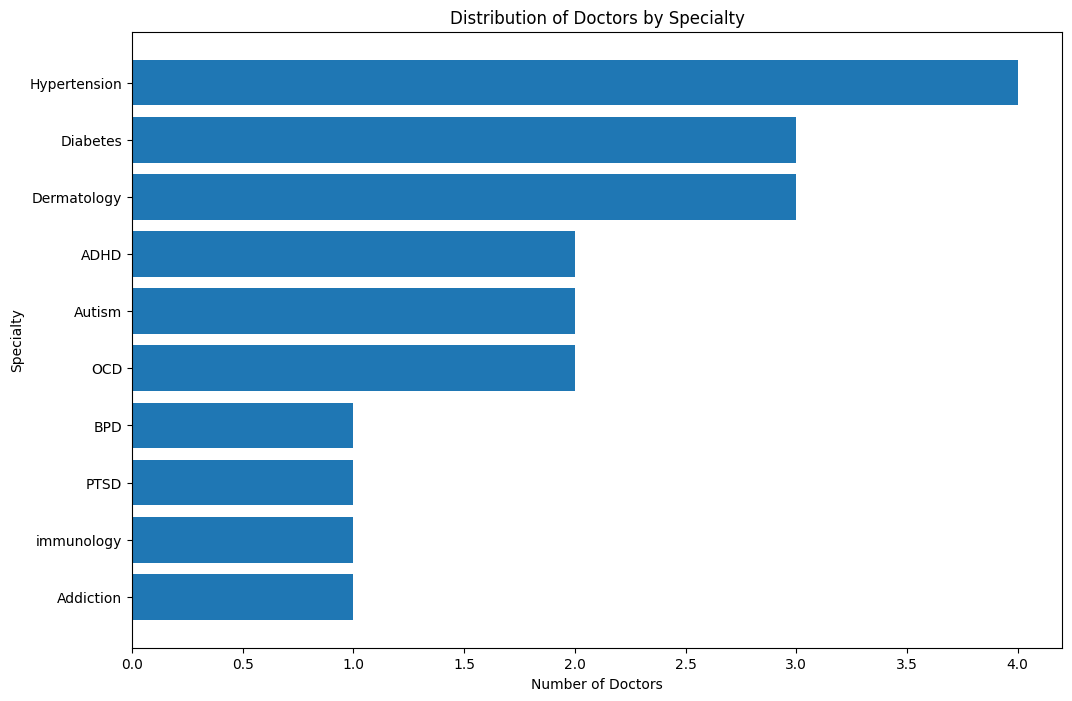

In [15]:
# Executing the query to get data
query_specialty_distribution = """
SELECT speciality_one, COUNT(*) AS number_of_doctors
FROM specialties
GROUP BY speciality_one
ORDER BY number_of_doctors DESC;
"""
specialty_distribution = run_query(query_specialty_distribution)

# Visualization with matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.barh(specialty_distribution['speciality_one'], specialty_distribution['number_of_doctors'])
plt.xlabel('Number of Doctors')
plt.ylabel('Specialty')
plt.title('Distribution of Doctors by Specialty')
plt.gca().invert_yaxis()  # To display the highest count at the top
plt.show()


### Visualization 2: Acceptance of New Patients by Gender

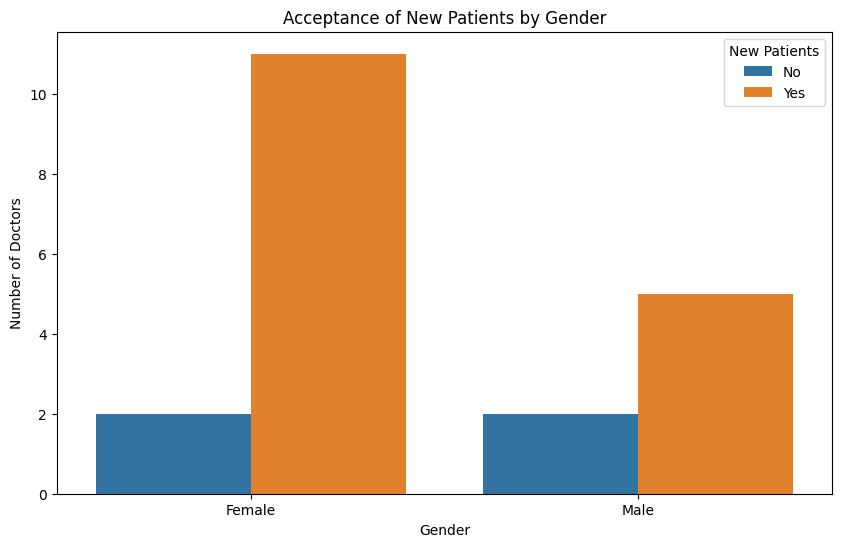

In [16]:
# Executing the query to get data
query_new_patients_by_gender = """
SELECT gender, new_patients, COUNT(*) AS number_of_doctors
FROM doctors
GROUP BY gender, new_patients;
"""
new_patients_by_gender = run_query(query_new_patients_by_gender)

# Visualization with seaborn
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='gender', y='number_of_doctors', hue='new_patients', data=new_patients_by_gender)
plt.xlabel('Gender')
plt.ylabel('Number of Doctors')
plt.title('Acceptance of New Patients by Gender')
plt.legend(title='New Patients')
plt.show()
